In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import pandas_profiling

### Loan_Data_Marketing-Datensatz laden

In [185]:
bank_df=pd.read_csv(r'C:\Users\tchak\Desktop\FranckScientist\Bankkreditdaten\bank-additional-full.csv', sep=';')
bank_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Dimensionen und Struktur des Datensatzes

In [186]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [84]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [85]:
# profil des Bank Marketing Datensatzes 
bank_df.profile_report()

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [187]:
# Die 12 Doppelte Zeilen löschen
bank_df = bank_df.drop_duplicates()

In [188]:
# fehlende Werte ausgeben
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [189]:
fehl_wert = bank_df.isnull().sum()
print("Summe der Anzahl der fehlenden Werte für jeden Attribut:\n{}".format(fehl_wert))

Summe der Anzahl der fehlenden Werte für jeden Attribut:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Statistische Übersicht des datensatzes

In [190]:
# Statistische Werte von numerischen Variablen
bank_df.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [191]:
# statistische Werte von kategorischen Variablen
bank_df.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome      y  
count   41176       41176        41176  41176  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13767        8618        35551  36537

In [192]:
print(bank_df[bank_df["job"]=="unknown"]["job"].count())
print(bank_df[bank_df["education"]=="unknown"]["education"].count())
print(bank_df[bank_df["loan"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["marital"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["housing"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["default"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["pdays"]< 0]["pdays"].count())


330
1730
990
80
990
8596
0


In [193]:
# Unknow-Zeilen löschen

bank_df.drop(bank_df.loc[bank_df['default']=='unknown'].index, inplace=True)
bank_df.drop(bank_df.loc[bank_df['marital']=='unknown'].index, inplace=True)
bank_df.drop(bank_df.loc[bank_df['loan']=='unknown'].index, inplace=True)
bank_df.drop(bank_df.loc[bank_df['housing']=='unknown'].index, inplace=True)
bank_df.drop(bank_df.loc[bank_df['job']=='unknown'].index, inplace=True)
bank_df.drop(bank_df.loc[bank_df['education']=='unknown'].index, inplace=True)

In [194]:
print(bank_df[bank_df["job"]=="unknown"]["job"].count())
print(bank_df[bank_df["education"]=="unknown"]["education"].count())
print(bank_df[bank_df["loan"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["marital"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["housing"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["default"]=="unknown"]["poutcome"].count())
print(bank_df[bank_df["pdays"]< 0]["pdays"].count())

0
0
0
0
0
0
0


### Analyse der Bankkunden

In [195]:
kunden = bank_df[['age','job','marital','education','default','housing','loan']]

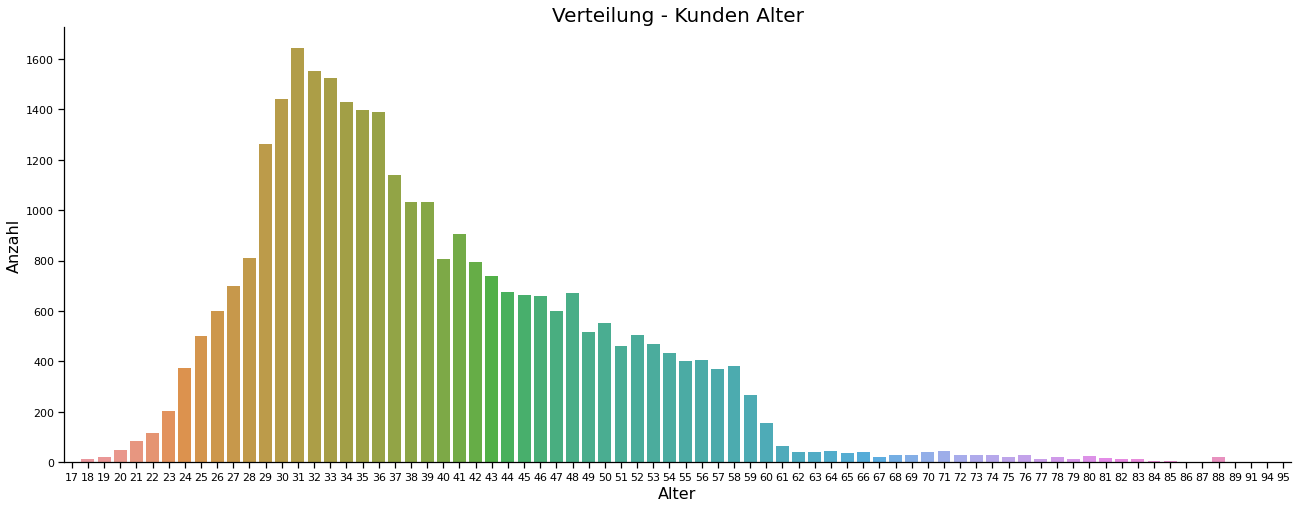

In [196]:
# Verteilung des Alters der Clients
fig, ax = plt.subplots()
fig.set_size_inches(22, 8)
sns.countplot(x = 'age', data = kunden)
ax.set_xlabel('Alter', fontsize=16)
ax.set_ylabel('Anzahl', fontsize=16)
ax.set_title('Verteilung - Kunden Alter', fontsize=20)
sns.despine()

In [197]:
age_group = [bank_df]
for column in age_group:
    column.loc[column["age"] < 30,  'Group age'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'Group age'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'Group age'] = 50
    column.loc[column["age"] >= 60, 'Group age'] = 60

<AxesSubplot:xlabel='Group age', ylabel='count'>

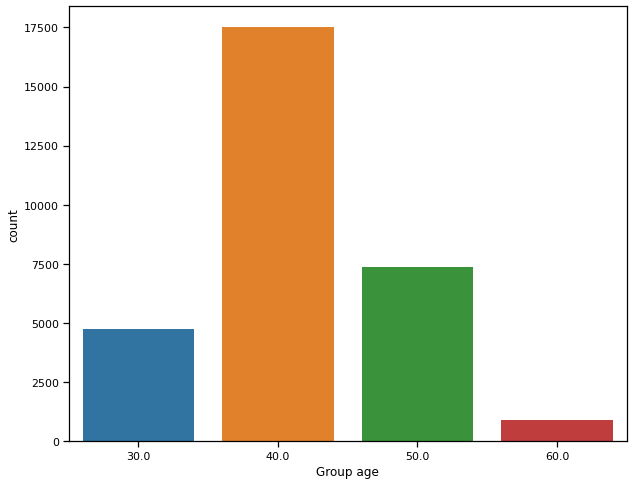

In [198]:
# Gruppierung der Kunden nach Altersgruppen
plt.figure(figsize=(10,8))
sns.countplot(x='Group age', data=bank_df)

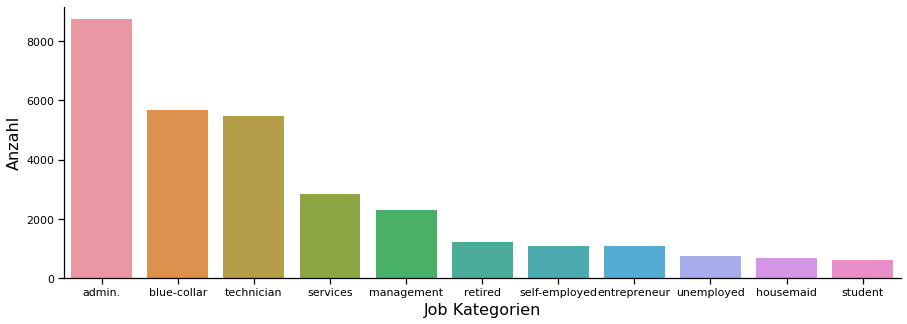

In [199]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'job', data = kunden,order = kunden['job'].value_counts().index)
ax.set_xlabel('Job Kategorien', fontsize=16)
ax.set_ylabel('Anzahl', fontsize=16)
#ax.set_title('Anzahl der Job-Kategorien', fontsize=20)
sns.despine()

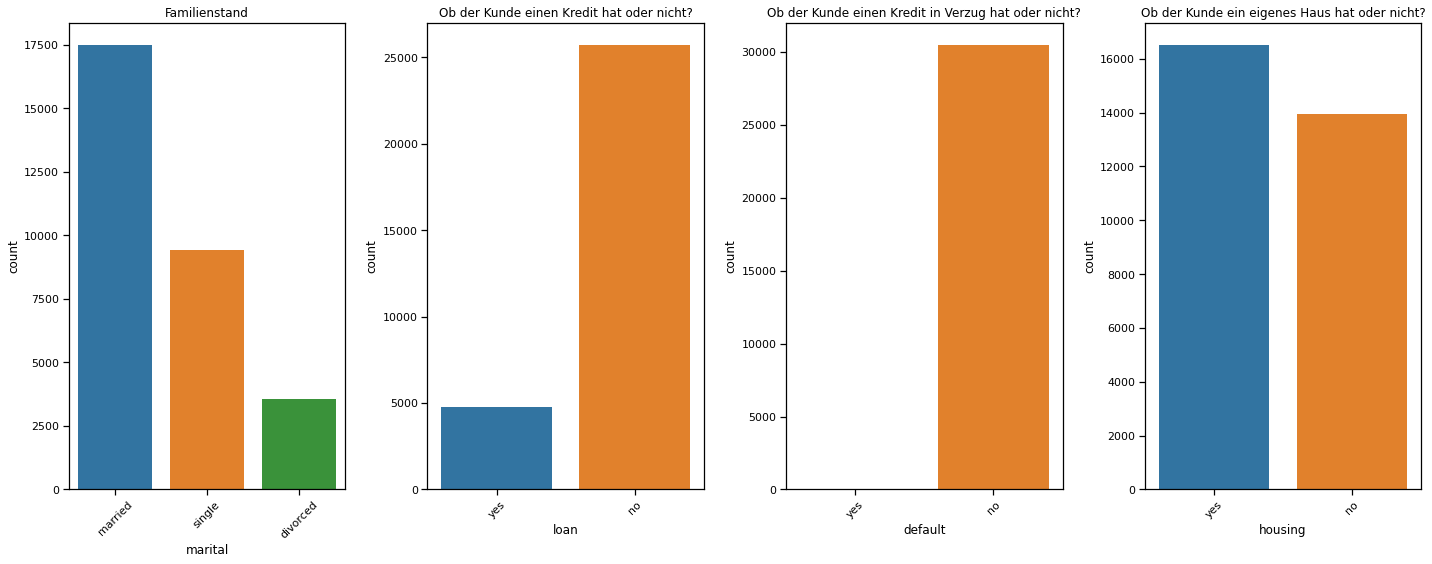

In [200]:
# Plot Familienstand und Bildungshintergrund der Kunden
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 8))
sns.countplot(x = kunden['marital'], ax = ax1,order = kunden['marital'].value_counts().index)
ax1.set_title('Familienstand', fontsize=12)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

sns.countplot(x = kunden['loan'], ax = ax2,order = ['yes','no'])
ax2.set_title('Ob der Kunde einen Kredit hat oder nicht?', fontsize=12)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)


sns.countplot(x = kunden['default'], ax = ax3,order = ['yes','no'])
ax3.set_title('Ob der Kunde einen Kredit in Verzug hat oder nicht?', fontsize=12)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)


sns.countplot(x = kunden['housing'], ax = ax4,order = ['yes','no'])
ax4.set_title('Ob der Kunde ein eigenes Haus hat oder nicht?', fontsize=12)
for tick in ax4.get_xticklabels():
    tick.set_rotation(45)

plt.subplots_adjust(wspace=3.5)
plt.tight_layout()

In [201]:
bank_df['default'].value_counts()

no     30475
yes        3
Name: default, dtype: int64

### Analyse der anderen Attribute der Kampagne

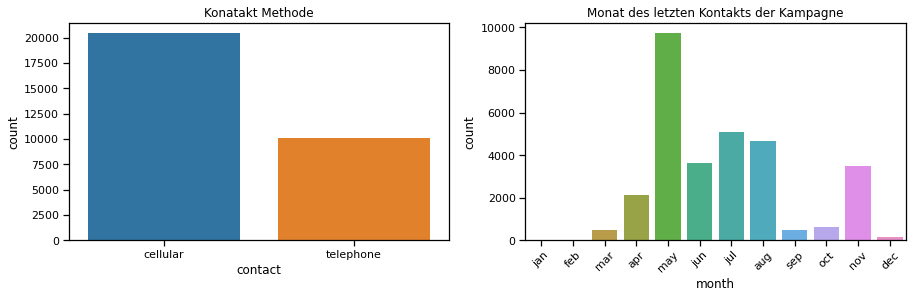

In [202]:
# Kontakt- und onatsmerkmale für den letzten Kontakt der aktuellen Kampagne

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
sns.countplot(x = bank_df['contact'], ax = ax1, order = bank_df['contact'].value_counts().index)
ax1.set_title('Konatakt Methode', fontsize=12)

sns.countplot(x = bank_df['month'], ax = ax2,order = ['jan', 'feb','mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec'])
ax2.set_title('Monat des letzten Kontakts der Kampagne', fontsize=12)
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)

In [203]:
kampagne = bank_df[['poutcome', 'previous', 'campaign','pdays']]

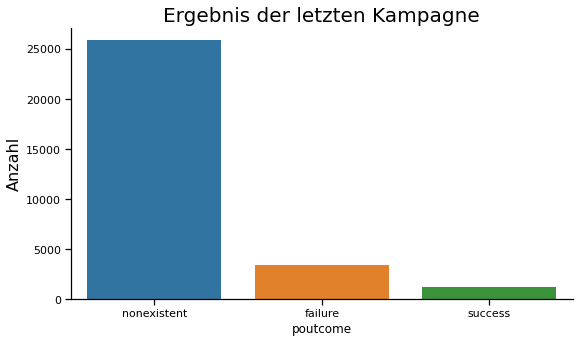

In [204]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)
sns.countplot(x = 'poutcome', data = kampagne)
ax.set_ylabel('Anzahl', fontsize=16)
ax.set_title('Ergebnis der letzten Kampagne', fontsize=20)
sns.despine()

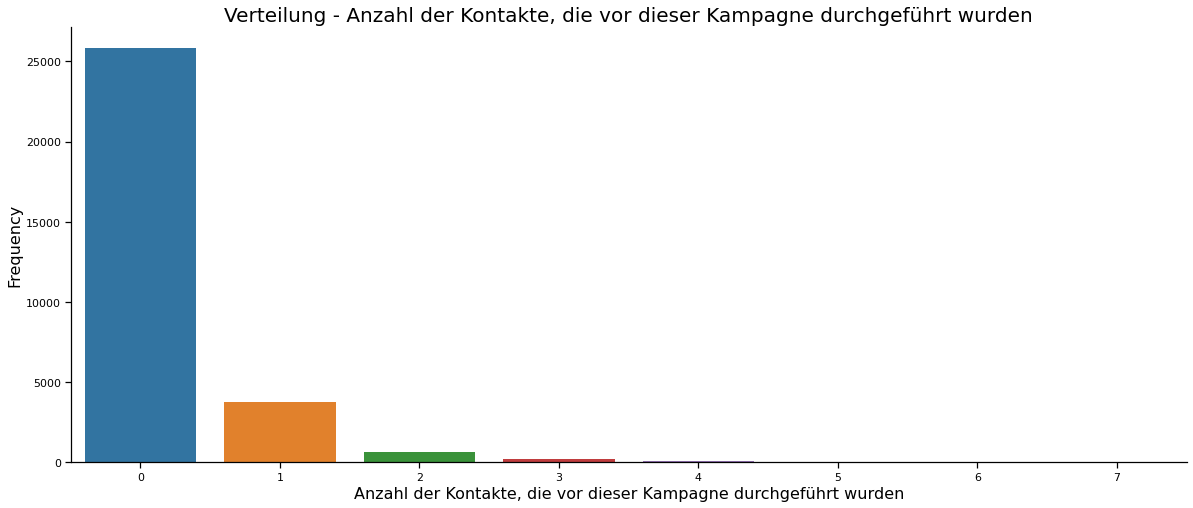

In [205]:
# Aus dem Diagramm können wir erkennen, dass die meisten Kunden vor dieser Kampagne nicht kontaktiert wurden
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = kampagne['previous'])
ax.set_xlabel('Anzahl der Kontakte, die vor dieser Kampagne durchgeführt wurden', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.set_title('Verteilung - Anzahl der Kontakte, die vor dieser Kampagne durchgeführt wurden', fontsize=20)
sns.despine()

     - Aus dieser Kampagne lässt sich klar sehen, dass die meinsten Kunden vor dieser Kampagne nicht kontaktiert wurden

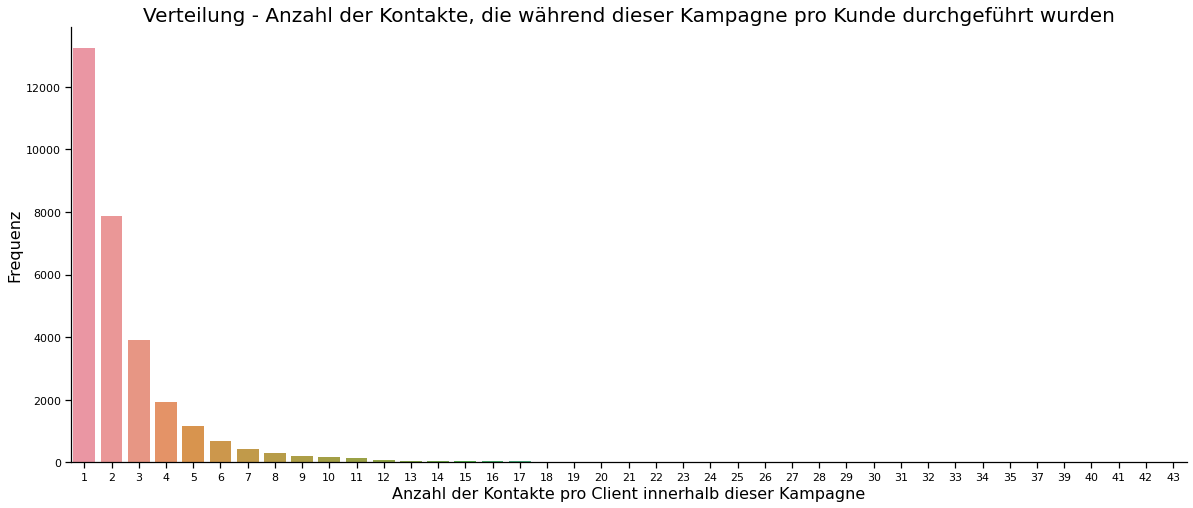

In [206]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = kampagne['campaign'])
ax.set_xlabel('Anzahl der Kontakte pro Client innerhalb dieser Kampagne', fontsize=16)
ax.set_ylabel('Frequenz', fontsize=16)
ax.set_title('Verteilung - Anzahl der Kontakte, die während dieser Kampagne pro Kunde durchgeführt wurden', fontsize=20)
sns.despine()

## Bivarite Analysis

<AxesSubplot:xlabel='job', ylabel='count'>

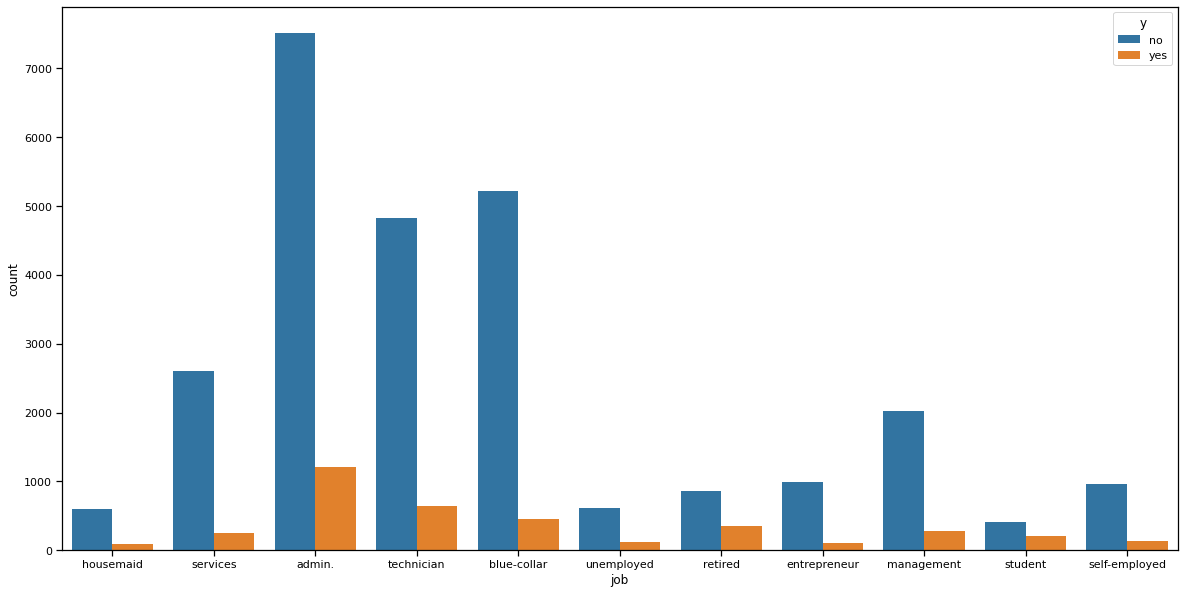

In [207]:
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='y',data=bank_df)

### Anhand der Diagramme können wir nach unserem Datensatz feststellen, dass :
    - Kredite mehr an Administratoren und an Techniker gewährt werden                               
    - Kredite weniger an Studierende, an Entrepreneur und an Selbstständig gewährt werden

<AxesSubplot:xlabel='marital', ylabel='count'>

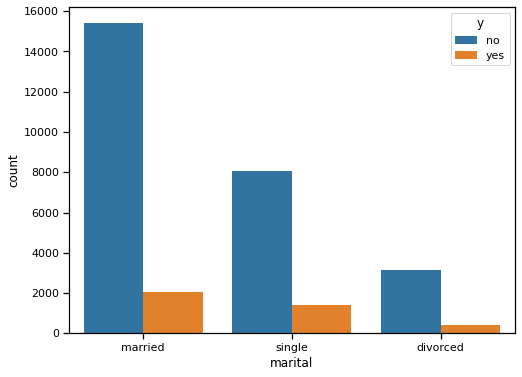

In [208]:
plt.figure(figsize=(8,6))
sns.countplot(x='marital',hue='y',data=bank_df)

<AxesSubplot:xlabel='housing', ylabel='count'>

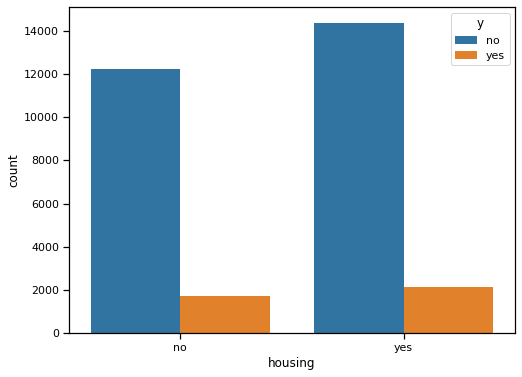

In [209]:
plt.figure(figsize=(8,6))
sns.countplot(x='housing',hue='y',data=bank_df)

<AxesSubplot:xlabel='month', ylabel='count'>

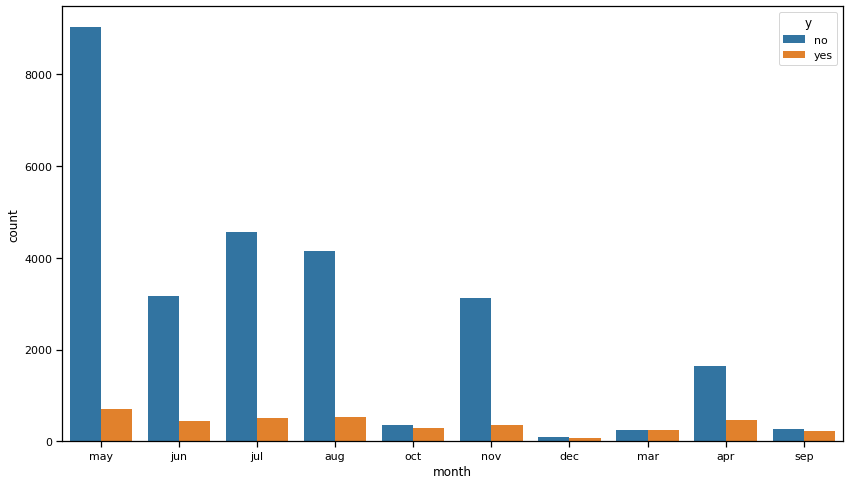

In [210]:
plt.figure(figsize=(14,8))
sns.countplot(x='month',hue='y',data=bank_df)

### Anhand der Diagramme können wir nach unserem Datensatz feststellen, dass :
    - Kredite am meisten im May gewährt werden                              
    - Kredite am wenigsten im Dezember und im März gewährt werden 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

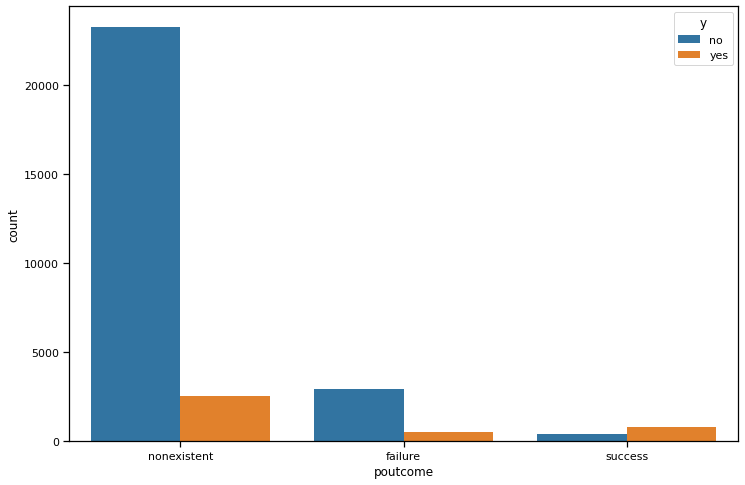

In [211]:
plt.figure(figsize=(12,8))
sns.countplot(x='poutcome',hue='y',data=bank_df)

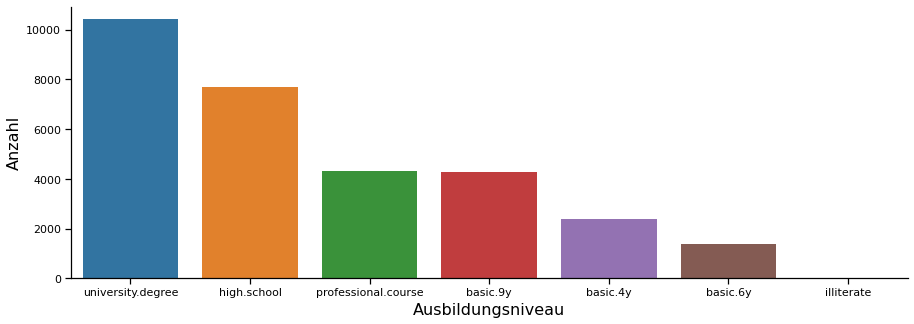

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education', data = bank_df,order = bank_df['education'].value_counts().index)
ax.set_xlabel('Ausbildungsniveau', fontsize=16)
ax.set_ylabel('Anzahl', fontsize=16)
sns.despine()

Text(0.5, 1.0, 'Duration V.S. Term Deposit')

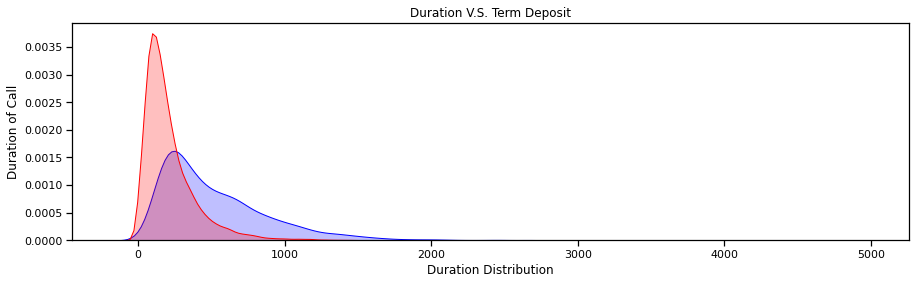

In [213]:
# Kernel-Dichte-Diagramm
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(bank_df.loc[(bank_df['y'] == 'yes'),'duration'] , color='b',shade=True,label='Yes')
ax=sns.kdeplot(bank_df.loc[(bank_df['y'] == 'no'),'duration'] , color='r',shade=True, label='No')
ax.set(xlabel='Duration Distribution', ylabel='Duration of Call')
plt.title('Duration V.S. Term Deposit')


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

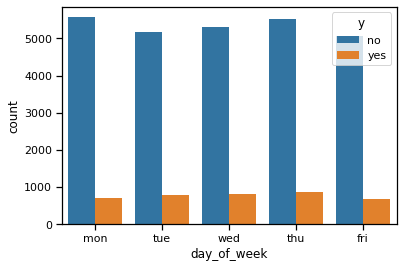

In [214]:
sns.countplot(x='day_of_week',hue='y',data=bank_df)

### Wir haben uns entschieden, die Daten in 3 Teile aufzuteilen
   - Kundendaten
   - Marketingsdaten
   - Wirtschaftsdaten

### Kundenspezifische Datenverarbeitung

In [215]:
client_df = bank_df.iloc[: , 0:7]
client_df.head()

age        job  marital            education default housing loan
0   56  housemaid  married             basic.4y      no      no   no
2   37   services  married          high.school      no     yes   no
3   40     admin.  married             basic.6y      no      no   no
4   56   services  married          high.school      no      no  yes
6   59     admin.  married  professional.course      no      no   no

# Checking the outliers in Age

### Altersdaten haben eine ziemliche Verteilung, wir werden sie in Bereiche unterteilen

In [216]:
# functions to create bucketing in age

def age(df):
    df.loc[df['age'] <= 32, 'age'] = 1
    df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
    df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age']=4
           
    return df

age(client_df);

<AxesSubplot:xlabel='Group age', ylabel='count'>

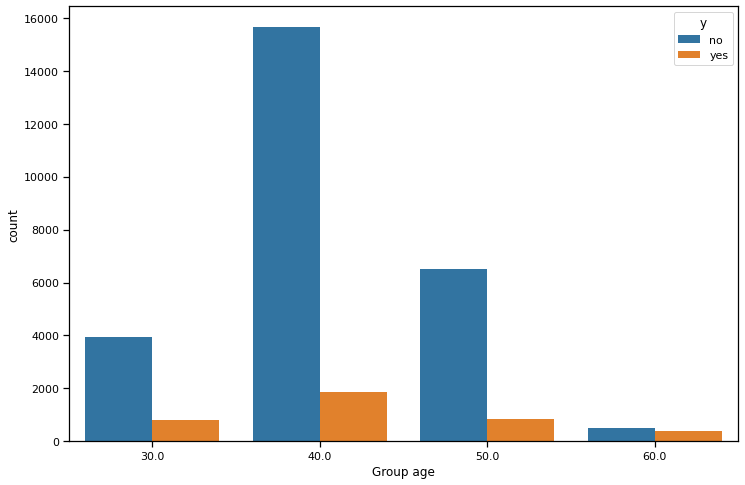

In [217]:
age_group = [bank_df]
for column in age_group:
    column.loc[column["age"] < 30,  'Group age'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'Group age'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'Group age'] = 50
    column.loc[column["age"] >= 60, 'Group age'] = 60
    

# Gruppierung der Kunden nach Altersgruppen
plt.figure(figsize=(12,8))
sns.countplot(x='Group age', data=bank_df, hue='y')

<AxesSubplot:xlabel='Group age', ylabel='count'>

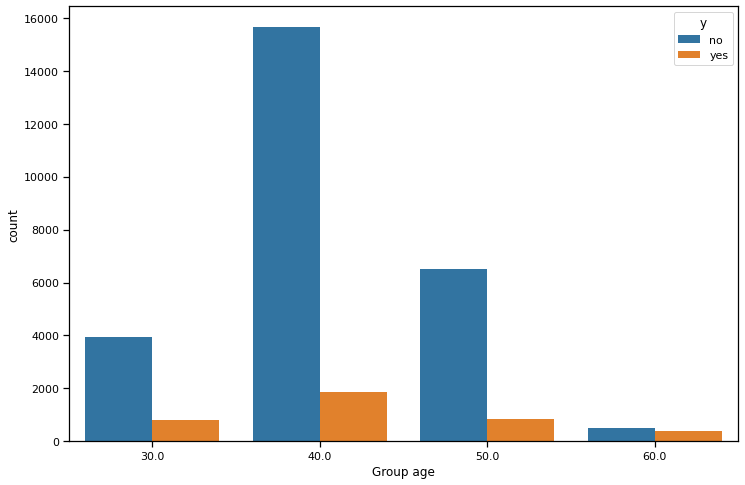

In [218]:
# Gruppierung der Kunden nach Altersgruppen
plt.figure(figsize=(12,8))
sns.countplot(x='Group age', data=bank_df, hue='y')

### Prüfung der kategorialen Daten

In [219]:
# Konvertieren kategorischer Spalten in numerische Werte
"""
client_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)


client_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

client_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)

client_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

client_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
"""


"\nclient_df['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)\n\n\nclient_df['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)\n\nclient_df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)\n\nclient_df['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n\nclient_df['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)\n"

### One hot encoding für alle kategorischen variable

In [220]:
client_df=pd.get_dummies(client_df)
client_df.head()

age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0    3           0                0                 0              1   
2    2           0                0                 0              0   
3    2           1                0                 0              0   
4    3           0                0                 0              0   
6    3           1                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               0            0                  0             0            0   
2               0            0                  0             1            0   
3               0            0                  0             0            0   
4               0            0                  0             1            0   
6               0            0                  0             0            0   

   ...  education_high.school  education_illiterate  \
0  ...                      0                     0   
2  ...                      1                     0   
3  ...                      0                     0   
4  ...                      1                     0   
6  ...                      0                     0   

   education_professional.course  education_university.degree  default_no  \
0                              0                            0           1   
2                              0                            0           1   
3                              0                            0           1   
4                              0                            0           1   
6                              1                            0           1   

   default_yes  housing_no  housing_yes  loan_no  loan_yes  
0            0           1            0        1         0  
2            0           0            1        1         0  
3            0           1            0        1         0  
4            0           1            0        0         1  
6            0           1            0        1         0  

[5 rows x 28 columns]

# Marketingsspezifische Daten

In [221]:
# Erstellen separater Datasets für marketingbezogene Daten
marketing_df = bank_df.iloc[: , 7:15]
marketing_df.head()


contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon       261         1    999         0   
2  telephone   may         mon       226         1    999         0   
3  telephone   may         mon       151         1    999         0   
4  telephone   may         mon       307         1    999         0   
6  telephone   may         mon       139         1    999         0   

      poutcome  
0  nonexistent  
2  nonexistent  
3  nonexistent  
4  nonexistent  
6  nonexistent

### Einteilung der Dauer in Zeitabschnitte

In [222]:
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
    df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
    df.loc[df['duration']  > 644.5, 'duration'] = 5

    return df

duration(marketing_df).head()

contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon         3         1    999         0   
2  telephone   may         mon         3         1    999         0   
3  telephone   may         mon         2         1    999         0   
4  telephone   may         mon         3         1    999         0   
6  telephone   may         mon         2         1    999         0   

      poutcome  
0  nonexistent  
2  nonexistent  
3  nonexistent  
4  nonexistent  
6  nonexistent

### Enconding - Monate

In [223]:

d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

marketing_df.month=marketing_df.month.map(d_mons)

In [224]:
# converting datatype to int
marketing_df['month'] = marketing_df['month'].astype(str).astype(int)

### Korrelation - Marketingsdaten

In [225]:
corr = marketing_df.corr()
corr

month  duration  campaign     pdays  previous
month     1.000000 -0.043738 -0.036264 -0.078763  0.064621
duration -0.043738  1.000000 -0.115697 -0.080048  0.046782
campaign -0.036264 -0.115697  1.000000  0.054335 -0.080808
pdays    -0.078763 -0.080048  0.054335  1.000000 -0.590240
previous  0.064621  0.046782 -0.080808 -0.590240  1.000000

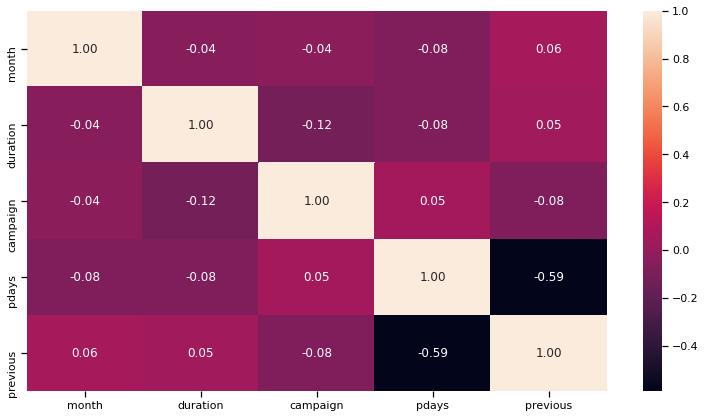

In [226]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

### OneHotEncoding

In [227]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
marketing_df['contact'] = le.fit_transform(marketing_df['contact'])
marketing_df['poutcome'] = le.fit_transform(marketing_df['poutcome'])

In [228]:
d_week = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 
    'sat':6, 'sun':7}

marketing_df.day_of_week=marketing_df.day_of_week.map(d_week)

In [229]:
# Datentyp in int konvertieren
marketing_df['contact'] =marketing_df['contact'].astype(str).astype(int)
marketing_df['month'] =marketing_df['month'].astype(str).astype(int)
marketing_df['day_of_week'] =marketing_df['day_of_week'].astype(str).astype(int)
marketing_df['poutcome'] =marketing_df['poutcome'].astype(str).astype(int)

In [230]:
marketing_df.head()

contact  month  day_of_week  duration  campaign  pdays  previous  poutcome
0        1      5            1         3         1    999         0         1
2        1      5            1         3         1    999         0         1
3        1      5            1         2         1    999         0         1
4        1      5            1         3         1    999         0         1
6        1      5            1         2         1    999         0         1

### Wirtschaftsspezifische Daten

In [231]:
# Wirtschaftsspezifische Daten ausgeben
index_df = bank_df.iloc[: , 15:21]
index_df.head()

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0           1.1          93.994          -36.4      4.857       5191.0  no
2           1.1          93.994          -36.4      4.857       5191.0  no
3           1.1          93.994          -36.4      4.857       5191.0  no
4           1.1          93.994          -36.4      4.857       5191.0  no
6           1.1          93.994          -36.4      4.857       5191.0  no

In [232]:
idx_corr=index_df.corr()
idx_corr

emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
emp.var.rate        1.000000        0.765989       0.157848   0.969411   
cons.price.idx      0.765989        1.000000       0.027420   0.667215   
cons.conf.idx       0.157848        0.027420       1.000000   0.243844   
euribor3m           0.969411        0.667215       0.243844   1.000000   
nr.employed         0.900367        0.488746       0.075483   0.944863   

                nr.employed  
emp.var.rate       0.900367  
cons.price.idx     0.488746  
cons.conf.idx      0.075483  
euribor3m          0.944863  
nr.employed        1.000000

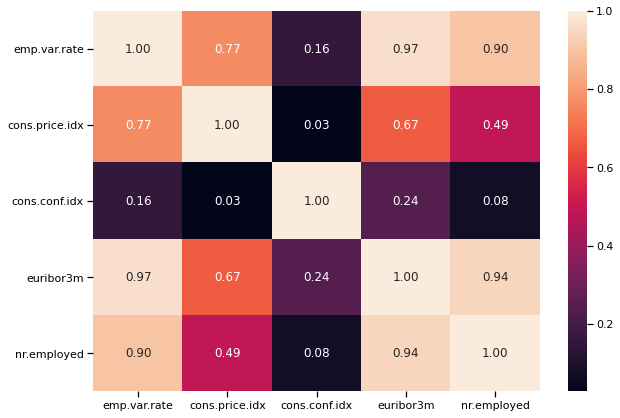

In [233]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(idx_corr, annot = True, fmt = ".2f")

### Hohe Korrelation 

Die Variable euribor3m ist hoch korreliert mit 3 Variablen wie emp.var.rate, cons.price.idx & nr.employed, so dass wir diese Variablen direkt entfernen können

In [234]:
index_df= index_df.loc[:, index_df.columns != 'emp.var.rate']
index_df= index_df.loc[:, index_df.columns != 'cons.price.idx']
index_df= index_df.loc[:, index_df.columns != 'nr.employed']

### Kombinierung der 3 Datenframes

In [235]:
bank_final_df = pd.concat([client_df, marketing_df, index_df], axis = 1)
bank_final_df.shape

(30478, 39)

In [236]:
bank_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30478 non-null  int64  
 1   job_admin.                     30478 non-null  uint8  
 2   job_blue-collar                30478 non-null  uint8  
 3   job_entrepreneur               30478 non-null  uint8  
 4   job_housemaid                  30478 non-null  uint8  
 5   job_management                 30478 non-null  uint8  
 6   job_retired                    30478 non-null  uint8  
 7   job_self-employed              30478 non-null  uint8  
 8   job_services                   30478 non-null  uint8  
 9   job_student                    30478 non-null  uint8  
 10  job_technician                 30478 non-null  uint8  
 11  job_unemployed                 30478 non-null  uint8  
 12  marital_divorced               30478 non-null 

### Feature Importance

In [237]:
bank_final_df = pd.concat([client_df, marketing_df, index_df], axis = 1)

In [238]:
#Import train_test_split aus sklearn.model_selection  
X = bank_final_df.loc[:, bank_final_df.columns != 'y']
Y = bank_final_df.loc[:, bank_final_df.columns == 'y']

In [239]:
# Target variable in numerische Zahl umwandlen
bank_final_df['y'].replace(['yes', 'no'],[1,0 ], inplace=True)

In [240]:
bank_final_df.columns

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [241]:
X = bank_final_df.loc[:, bank_final_df.columns != 'y']
Y = bank_final_df.loc[:, bank_final_df.columns == 'y']

In [242]:
X.columns

Index(['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

### Aufteilung der Daten in Test und Train

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [245]:
!pip install imblearn

#### SMOTE

In [246]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

In [247]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [248]:
X=os_data_X
Y=os_data_y

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

# Selektion der Modelle

### Decision Tree

In [250]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print('Decision Tree')
print(classification_report(y_test, y_pred))




Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5616
           1       0.91      0.92      0.92      5561

    accuracy                           0.92     11177
   macro avg       0.92      0.92      0.92     11177
weighted avg       0.92      0.92      0.92     11177



### Random Forest

In [251]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
print('\n')
random_forest.score(X_train, y_train)

# print(confusion_matrix(y_test, y_pred))
print('Random Forest')
print(classification_report(y_test, y_pred))

C:\Users\tchak\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until




Random Forest
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5616
           1       0.93      0.96      0.94      5561

    accuracy                           0.94     11177
   macro avg       0.94      0.94      0.94     11177
weighted avg       0.94      0.94      0.94     11177



# Decision Tree

### Hyper-Parameter-Einstellung

In [252]:
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth': np.arange(1, 10)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid_tree.fit(X_train, y_train)

tree_preds = grid_tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

In [253]:
print(grid_tree.best_estimator_)
print('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))
print('Best CV Score:')
print(grid_tree.best_score_)

DecisionTreeClassifier(max_depth=9)
DecisionTree: Area under the ROC curve = 0.9364939826918337
Best CV Score:
0.8762605656171143
